# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
oil = pd.read_excel('/content/Crude Oil Prices Daily 1986-2023.xlsx')
oil

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87
...,...,...
9607,2023-10-03,89.23
9608,2023-10-04,84.22
9609,2023-10-05,82.31
9610,2023-10-06,82.79


# Data Exploration

In [5]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9612 entries, 0 to 9611
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9612 non-null   datetime64[ns]
 1   Closing Value  9605 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 150.3 KB


In [6]:
oil.isna().value_counts()

Date   Closing Value
False  False            9605
       True                7
dtype: int64

There are 7 null values in data set.

In [7]:
# replacing na values in Closing Value of oil by Forward fill method
oil["Closing Value"].fillna( method ='ffill', inplace = True)
oil

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87
...,...,...
9607,2023-10-03,89.23
9608,2023-10-04,84.22
9609,2023-10-05,82.31
9610,2023-10-06,82.79


Filling Null values by Fill forward method

In [8]:
oil.describe()

,Closing Value
count,9612.000000
mean,46.855562
std,29.560247
min,10.010000
25%,20.120000
50%,38.250000
75%,69.300000
max,145.310000


In [9]:
oil1 = oil.copy()
oil1.head

<bound method NDFrame.head of            Date  Closing Value
0    1986-01-02          25.56
1    1986-01-03          26.00
2    1986-01-06          26.53
3    1986-01-07          25.85
4    1986-01-08          25.87
...         ...            ...
9607 2023-10-03          89.23
9608 2023-10-04          84.22
9609 2023-10-05          82.31
9610 2023-10-06          82.79
9611 2023-10-09          86.38

[9612 rows x 2 columns]>

In [10]:
oil.set_index('Date', inplace=True)
oil

,Closing Value
Date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87
...,...
2023-10-03,89.23
2023-10-04,84.22
2023-10-05,82.31


# Data Visualization

## line Plot and Histogram

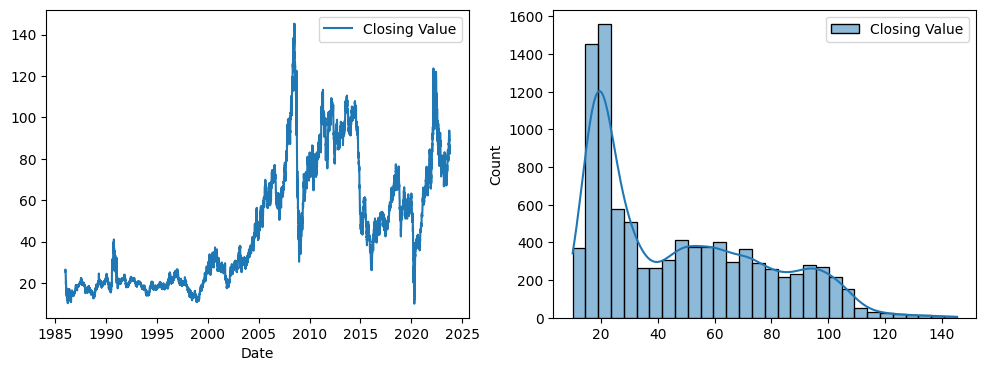

In [11]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.lineplot(data=oil)

plt.subplot(1, 2, 2)
sns.histplot(data=oil, kde= True)

plt.show()

The graph show right skewness

## Lag Plot

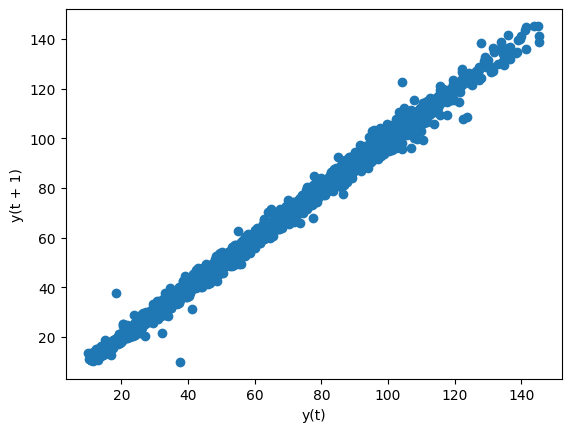

In [12]:
# create a scatter plot
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import lag_plot
lag_plot(oil)
pyplot.show()

Here the lagplot show linear association between current value and sucession value

## Autocorrelation

<Figure size 4000x1000 with 0 Axes>

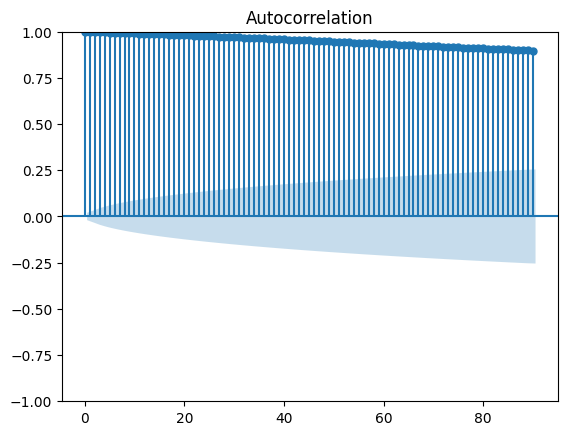

In [13]:
pyplot.figure(figsize = (40,10))
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(oil,lags=90)
pyplot.show()

There is degree of similarity between a time series and a lagged version of itself

## Box Plot

In [14]:
oil.rename(columns={'Closing Value': 'Closing_value', },inplace=True)
print(oil.columns)

Index(['Closing_value'], dtype='object')


In [15]:
oil1

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87
...,...,...
9607,2023-10-03,89.23
9608,2023-10-04,84.22
9609,2023-10-05,82.31
9610,2023-10-06,82.79


In [16]:
oil1['Date'] = pd.to_datetime(oil1.Date, format='%b-%y')
oil1["Month"]=oil1.Date.dt.strftime("%b")
oil1["Year"]=oil1.Date.dt.strftime("%Y")
oil1.head()

,Date,Closing Value,Month,Year
0,1986-01-02,25.56,Jan,1986
1,1986-01-03,26.00,Jan,1986
2,1986-01-06,26.53,Jan,1986
3,1986-01-07,25.85,Jan,1986
4,1986-01-08,25.87,Jan,1986


In [17]:
oil1.rename(columns={'Closing Value': 'Closing_value', },inplace=True)
print(oil1.columns)

Index(['Date', 'Closing_value', 'Month', 'Year'], dtype='object')


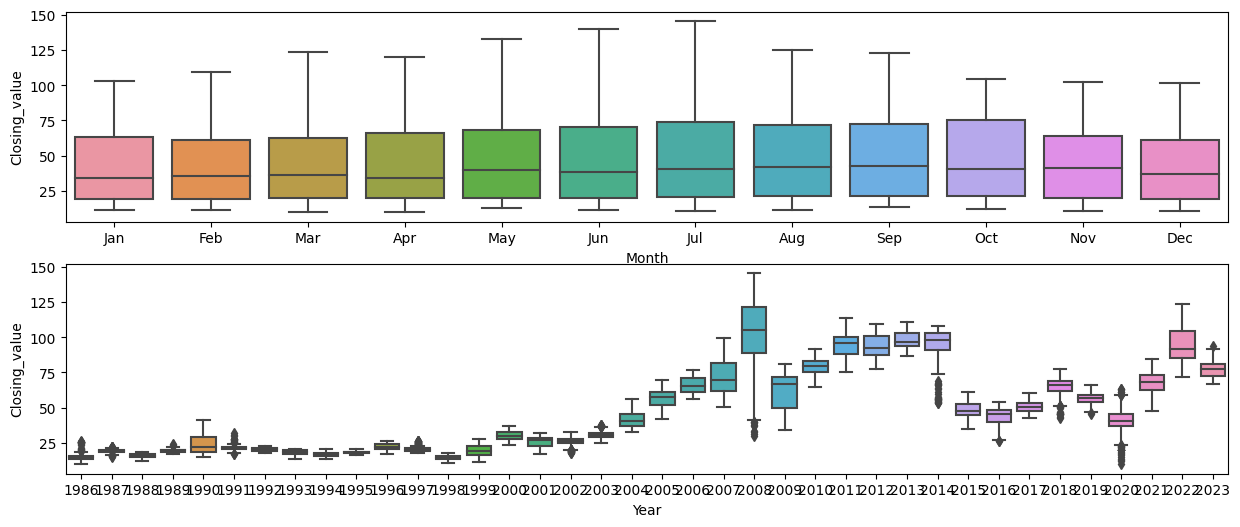

In [18]:
plt.figure(figsize=(15,6))
plt.subplot(211)
sns.boxplot(x="Month", y="Closing_value", data=oil1)
plt.subplot(212)
sns.boxplot(x="Year", y="Closing_value", data=oil1)
plt.show()

<Axes: xlabel='Month', ylabel='Year'>

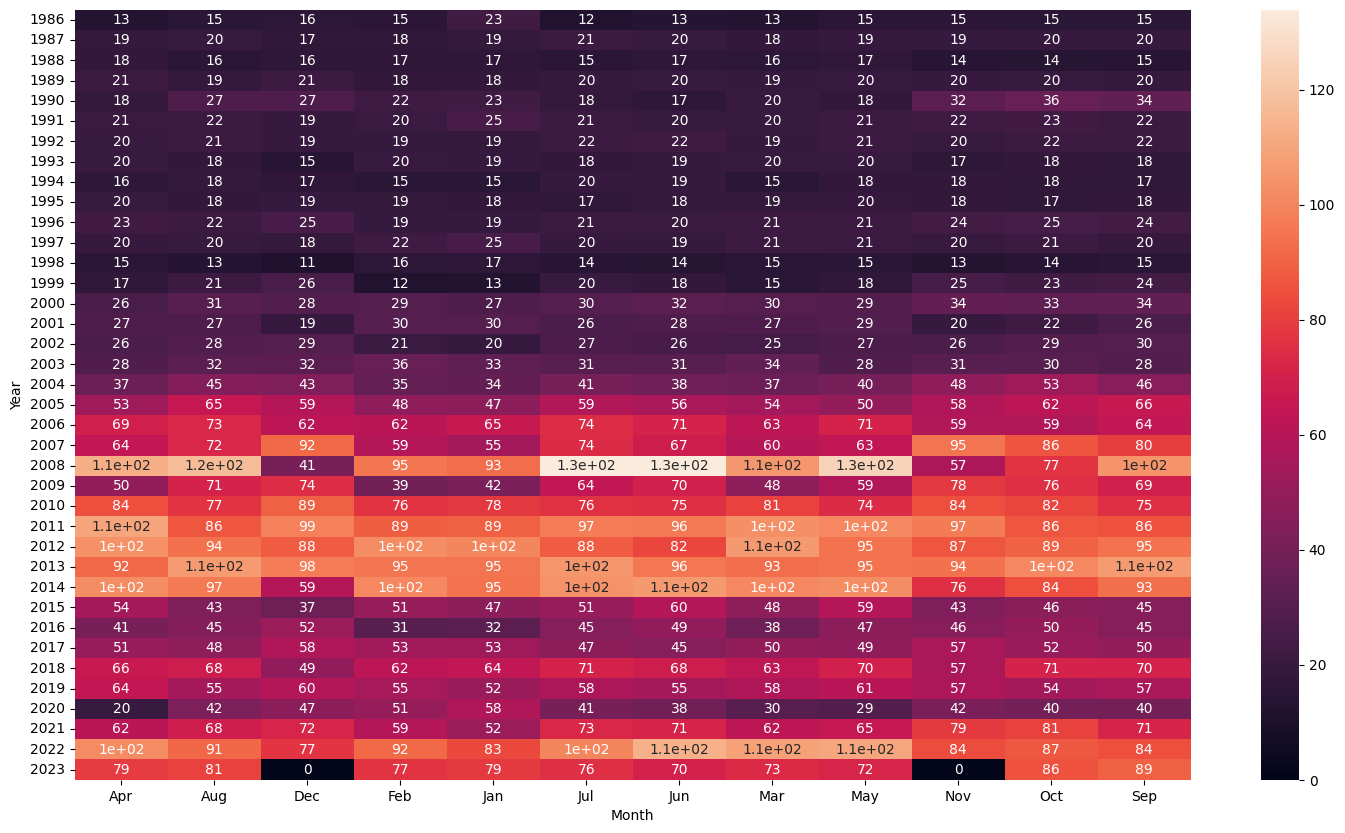

In [19]:
plt.figure(figsize=(18,10))
heatmap_y_month = pd.pivot_table(data=oil1,values='Closing_value',index='Year', columns="Month", aggfunc='mean', fill_value=0)
sns.heatmap(data = heatmap_y_month, annot=True)

In [20]:
new_data=pd.DataFrame(oil1)

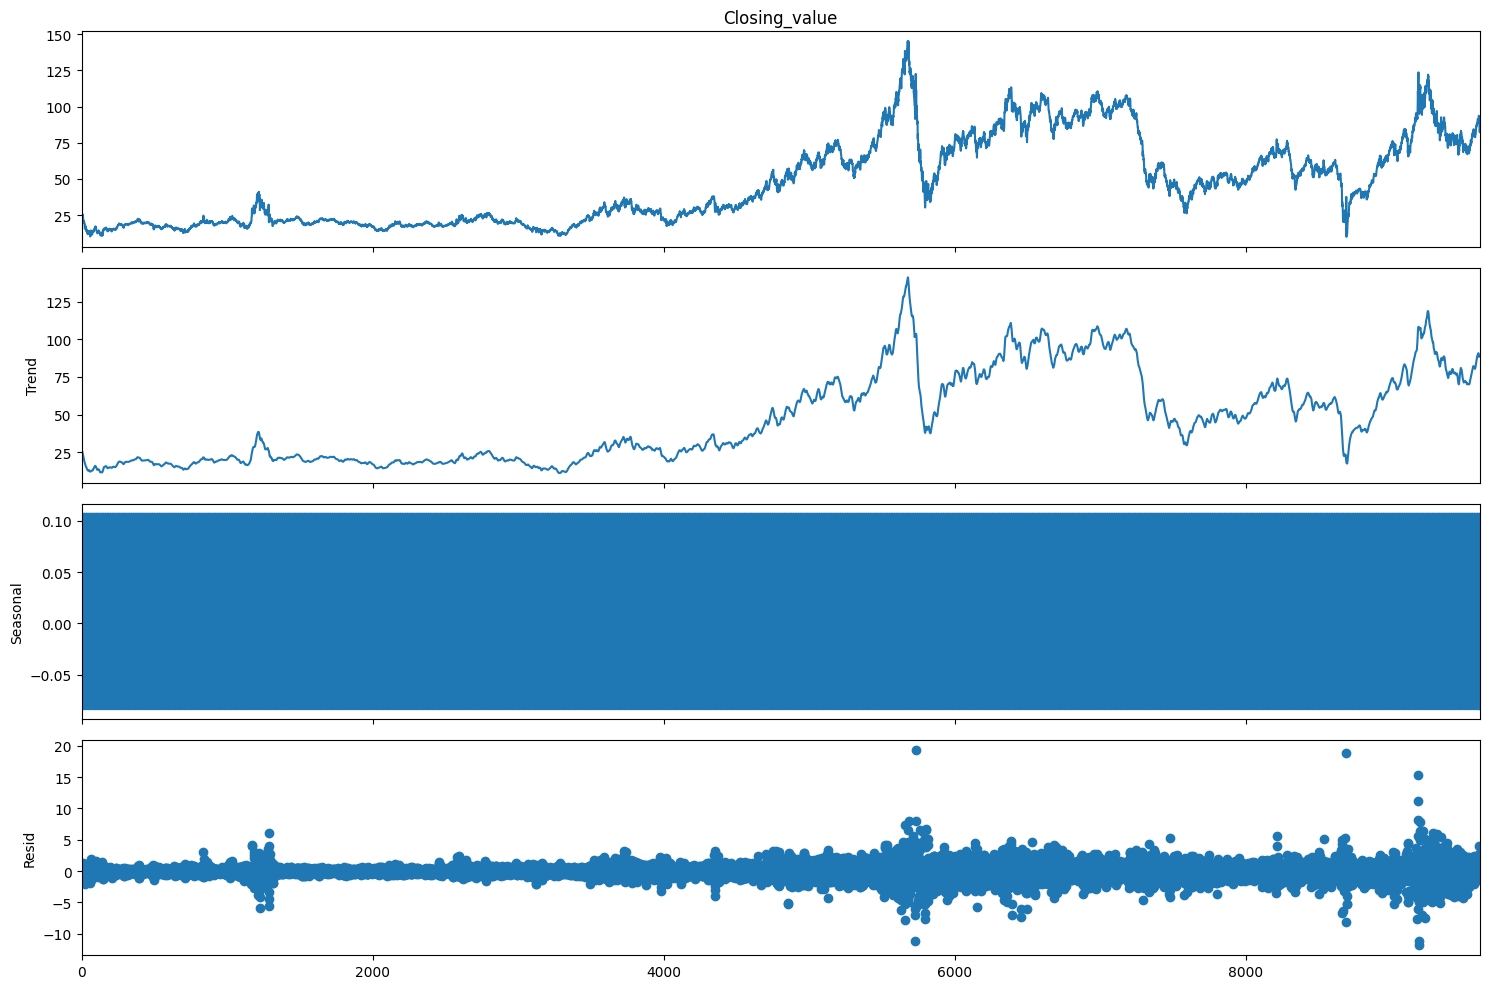

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts_add=seasonal_decompose(new_data.Closing_value, period=12)
with plt.rc_context():
    plt.rc("figure", figsize=(15,10))
    decompose_ts_add.plot()
    plt.show()

## Outliers

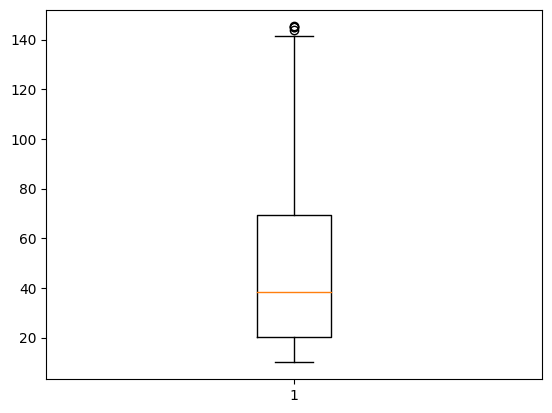

,Closing_value
count,9612.000000
mean,46.855562
std,29.560247
min,10.010000
25%,20.120000
50%,38.250000
75%,69.300000
max,145.310000


In [22]:
#boxplot
plt.boxplot(oil1['Closing_value'])
plt.show()
oil.describe()

In [23]:
q1 = oil1['Closing_value'].quantile(0.25)
q3 = oil1['Closing_value'].quantile(0.75)
IQR = q3-q1

print ('Q1=',q1,'Q3=', q3,'IQR=', IQR)

Q1= 20.12 Q3= 69.3 IQR= 49.17999999999999


In [24]:
upper_limit = q3 + (1.5 * IQR)
lower_limit = q3 - (1.5 * IQR)

print ('Upper Limit=',upper_limit,'Lower Limit=', lower_limit)

Upper Limit= 143.07 Lower Limit= -4.469999999999985


In [25]:
#finding outliers
oil1.loc[(oil1['Closing_value'] > upper_limit) | (oil1['Closing_value'] < lower_limit)]

,Date,Closing_value,Month,Year
5677,2008-07-02,143.74,Jul,2008
5678,2008-07-03,145.31,Jul,2008
5683,2008-07-11,144.96,Jul,2008
5684,2008-07-14,145.16,Jul,2008


In [26]:
# trimming the outlier values
df = oil1.loc[(oil1['Closing_value'] < upper_limit) & (oil1['Closing_value'] > lower_limit)]

print('with ouliers =', len(oil1))
print('after removing outliers =', len(df))

with ouliers = 9612
after removing outliers = 9608


In [27]:
df

,Date,Closing_value,Month,Year
0,1986-01-02,25.56,Jan,1986
1,1986-01-03,26.00,Jan,1986
2,1986-01-06,26.53,Jan,1986
3,1986-01-07,25.85,Jan,1986
4,1986-01-08,25.87,Jan,1986
...,...,...,...,...
9607,2023-10-03,89.23,Oct,2023
9608,2023-10-04,84.22,Oct,2023
9609,2023-10-05,82.31,Oct,2023
9610,2023-10-06,82.79,Oct,2023


In [28]:
df.to_csv('df')